## Image Processing & Transformation

Image processing deals with manipulation of digital images through a digital computer. Image processing focuses on developing a computer system that is able to perform processing on an image. The input of that system is a digital image and the system process that image using efficient algorithms, and gives an image as an output.
![Image Processing system](https://www.tutorialspoint.com/dip/images/introduction_image.jpg)

Translation in computer vision refers to the process of shifting an image along its axes. Images can be shifted in upwards, downwards, sideways directions or with a combination of these directions through the image translation process.

Some techniques are listed below:

* Image Translation
* Image Rotation
* Image Resize
* Image Flipping
* Image Cropping

In [1]:
# loading libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

In [2]:
# loading sample image
image = cv2.imread('../input/cat-image/cat-2083492__340.jpg')
image

array([[[  0,  46,  28],
        [ 20,  65,  48],
        [ 19,  55,  43],
        ...,
        [ 53, 163, 159],
        [ 54, 164, 160],
        [ 53, 163, 159]],

       [[  0,  31,  14],
        [  0,  24,   9],
        [  0,  25,  13],
        ...,
        [ 54, 164, 160],
        [ 55, 165, 161],
        [ 55, 165, 161]],

       [[129, 165, 151],
        [ 86, 121, 107],
        [ 17,  51,  40],
        ...,
        [ 57, 167, 163],
        [ 58, 168, 164],
        [ 58, 168, 164]],

       ...,

       [[  0,  53,  28],
        [ 10,  70,  46],
        [ 29,  94,  78],
        ...,
        [  5,  94,  84],
        [  7,  96,  86],
        [ 10,  98,  85]],

       [[  0,  44,  19],
        [  5,  65,  41],
        [ 30,  95,  79],
        ...,
        [  4,  93,  83],
        [  5,  94,  84],
        [  8,  96,  83]],

       [[  0,  45,  20],
        [  3,  63,  39],
        [ 24,  89,  73],
        ...,
        [  3,  92,  82],
        [  4,  93,  83],
        [  7,  95,  82]]

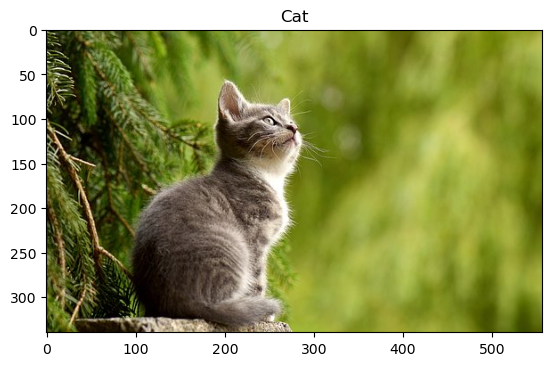

In [3]:
# Function to display images
def displayImage(image,title):
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     plt.figure(figsize=(8,8))
    plt.imshow(img)
    plt.title(title)
#     plt.show()

displayImage(image,'Cat')

### Image Translation

Translation refers to the rectilinear shift of an object i.e. an image from one location to another. If we know the amount of shift in horizontal and the vertical direction, say (tx, ty) then we can make a transformation matrix e.g.

![Trannslation matrix](https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-982f640278de92be1eebb332a70f0c17_l3.svg)

where tx denotes the shift along the x-axis and ty denotes shift along the y-axis i.e. the number of pixels by which we need to shift about in that direction.

In [4]:
# Generating Translation matrix
translationX = 100
translationY = 150
image_translated = np.float32([[1,0,translationX],[0,1,translationY]])
image_translated

array([[  1.,   0., 100.],
       [  0.,   1., 150.]], dtype=float32)

here image.shape[1] means image width = X and image.shape[0] means image height = Y

In [5]:
# Applying translation matrix to sample image
imageShift = cv2.warpAffine(image,image_translated,(image.shape[1],image.shape[0]))
imageShift

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 70, 177, 161],
        [ 71, 178, 162],
        [ 74, 181, 165]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 70, 177, 161],
        [ 71, 178, 162],
        [ 75, 182, 166]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 70, 177, 161],
        [ 71, 178, 162],
        [ 74, 181, 165]]

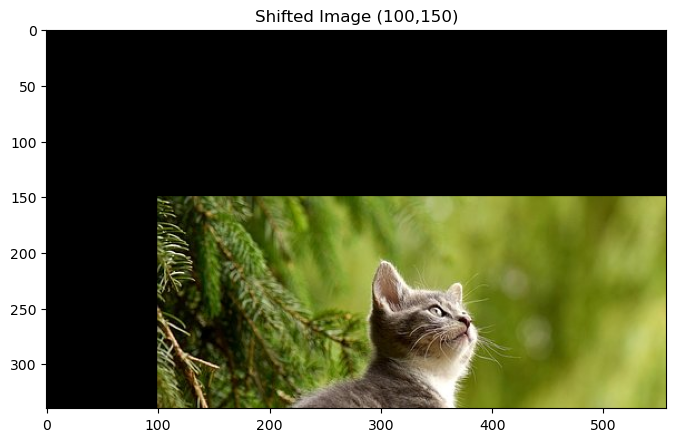

In [6]:
# Display after applying associat matrix
plt.figure(figsize=(8,8))

displayImage(imageShift,f"Shifted Image ({translationX},{translationY})")


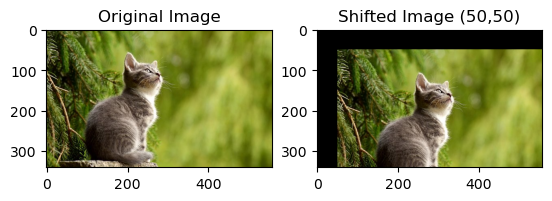

In [7]:
# Building Translation function
def imageTranslation(image, transX, transY):
    # translation matrix
    image_translated = np.float32([[1,0,transX],[0,1,transY]])
    # applying translation matrix to original
    imageShifted = cv2.warpAffine(image,image_translated,(image.shape[1],image.shape[0]))
    
    # Compare result to original
    plt.subplot(1,2,1)
    displayImage(image,"Original Image")
    plt.subplot(1,2,2)
    displayImage(imageShifted,f"Shifted Image ({transX},{transY})")
    plt.show()
    
imageTranslation(image, 50, 50)

### Image Rotation

Rotation can be defined as the circular motion of an object around its centre or some axis.

Rotation may be clockwise or anti-clockwise and an object can be rotated at different angles in rotation. When the rotation is in the clockwise direction, the angle of rotation is considered negative whereas it is considered to be positive in the case of anti-clockwise rotation.

In [8]:
# Calculating image center
imageCenter = (image.shape[1]//2, image.shape[1]//2)
imageCenter

(278, 278)

In [9]:
# Rotation matrix
imageRotate = cv2.getRotationMatrix2D(imageCenter, angle=45, scale=1)
imageRotate

array([[   0.70710678,    0.70710678, -115.15137034],
       [  -0.70710678,    0.70710678,  278.        ]])

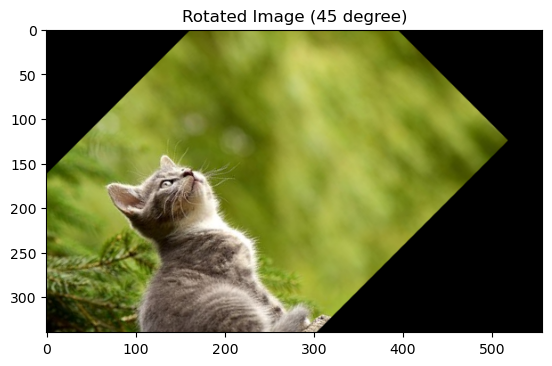

In [10]:
# applying rotation matrix to image
imageRotated = cv2.warpAffine(image,imageRotate,(image.shape[1],image.shape[0]))

displayImage(imageRotated,f"Rotated Image (45 degree)")

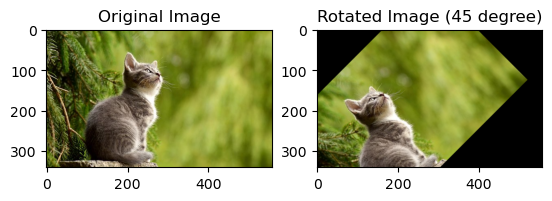

In [11]:
# Rotation function
def imageRotation(image,degree,scale):
    # image center
    imageCenter = (image.shape[1]//2, image.shape[1]//2)
    # Rotation matrix
    imageRotate = cv2.getRotationMatrix2D(imageCenter, angle=degree, scale=scale)
    # applying rotation matrix to image
    imageRotated = cv2.warpAffine(image,imageRotate,(image.shape[1],image.shape[0]))
    
    # compare result to original
    plt.subplot(1,2,1)
    displayImage(image,"Original Image")
    plt.subplot(1,2,2)
    displayImage(imageRotated,f"Rotated Image ({degree} degree)")
    plt.show()
    
imageRotation(image, 45, 1)

### Image Resize

Image resizing is a process of approximation. We use a finite set of data to predict color/intensity values at unknown locations. Therefore it is either impossible or impractical to scale without using some sort of approximation technique for determining the pixel values at the new locations. Ex: If we upscale the image we end up with new pixel locations. Those location don’t have any pixel values. If we don’t use interpolation then the new locations are devoid of intensity. So in order to provide a value to those pixels we use interpolation techniques which calibrate the values of the pixels based on its surroundings

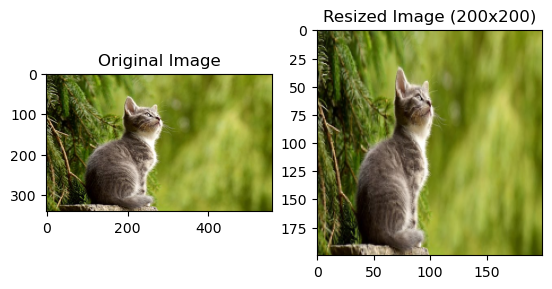

In [12]:
# Image resize function
def imageResize(image, height, width):
    imageResize =  cv2.resize(image, (width,height), interpolation=cv2.INTER_AREA)
    
    # compare image to original
    plt.subplot(1,2,1)
    displayImage(image,"Original Image")
    plt.subplot(1,2,2)
    displayImage(imageResize,f"Resized Image ({height}x{width})")
    plt.show()
    
imageResize(image, 200, 200)

### Image flipping

flipcode = 1 means flipping according to horizontal direction, where flipCode=0 represents to horizontal

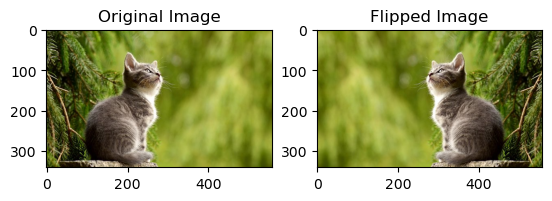

In [13]:
# flipping function
def imageflip(image):
    imageFlip = cv2.flip(image, flipCode=1)
    
    # compare result to original
    plt.subplot(1,2,1)
    displayImage(image,"Original Image")
    plt.subplot(1,2,2)
    displayImage(imageFlip,f"Flipped Image")
    plt.show()
    
imageflip(image)

### Image Cropping

**Cropping** is the act of selecting and extracting the Region of Interest (or simply, ROI) and is the part of the image in which we are interested.

Every image that is read in, gets stored in a 2D array (for each color channel). In Python, cropping the image using the same method as NumPy array slicing. To slice an array, you need to specify the start and end index of the first as well as the second dimension. 
 4 coordinates (or a pair of size 2 tuples) are required for cropping. The first set of coordinates specify the **Top left corner** of the ROI (or Bbox) and the next two denote the **bottom right corner** coordinates of the ROI. 
 
image[y:y+h, x:x+w] 

Here x and y are the starting point for cropping and h and w is the height and width for the image.

for an example , if [100:200, 100:350] then top left coordinates of (100, 100) and bottom right coordinates of (350, 200)
![Image cropping](https://blog.finxter.com/wp-content/uploads/2021/05/crop_img_opencv-1024x576.jpg)

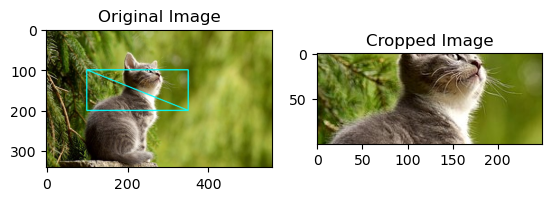

In [14]:
# Cropping function
def imageCropping(image):
    # image[start_x:end_x, start_y:end_y]
    # image[top : (top + height) , right: (right + width)]
    # image[y:y+h, x:x+w]
    # img[start_row:end_row, start_col:end_col]
    # Image.crop(left, top, right, bottom)
    
    img = image.copy()
    # Draw a rectangle around the region to crop
    cv2.rectangle(img,(100,100),(350,200),(255,255,0),2)
    # Draw a line to connect two point for understanding - top left & bottom right
    cv2.line(img,(100,100),(350,200),(255,255,0),2)
    
    # Crop the image to the rectangle
    imageCropped = image[100:200,100:350]
    
    # compare result to original
    plt.subplot(1,2,1)
    displayImage(img,"Original Image")
    plt.subplot(1,2,2)
    displayImage(imageCropped,f"Cropped Image")
    plt.show()
    
imageCropping(image)